In [103]:
include("../LiPoSID.jl")
using LinearAlgebra
using Combinatorics
using Plots

Trace distance:

$D(\rho_1, \rho_2) = \frac{1}{2} \operatorname{Tr}|\rho_1 - \rho_2|$,

where $|A| = \sqrt{A^\dagger A}$

Non-Markovianity:

(H.-P. Breuer, E.-M. Laine, J. Piilo, "Measure for the Degree of Non-Markovian Behavior of Quantum Processes in Open Systems," Physical Review Letters, 2009.)

$\sigma = \frac{dD}{dt}$

$ N = \max_{\rho_1(0), \rho_2(0)}{\int_{\sigma>0}{\sigma dt}} $

In [82]:
function TrDist(ρ₁, ρ₂)
    A = ρ₁-ρ₂
    D = tr(sqrt(A'*A))/2
    if abs(imag(D))>1e-6
        throw(DomainError(D, "Trace distance is complex number"))
    else
        return(real(D))
    end
end    

ρ₁ = [1 im
      -im 0]

ρ₂ = [.99 im
      -im .01]      

TrDist(ρ₁, ρ₂)

0.010000000000000005

In [83]:
data_dir = "../DATA/"
println(data_dir)

models_dir = "../MODELS/"
tests_dir = "../TESTS/"

γ = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

dodeca_files = ["State_D"*string(n) for n=1:20];
basis_files = ["State_B"*string(n) for n=1:4];

../DATA/


In [104]:
function NonMarkovianity(γᵢ)
    N=[]
    for (i,j)  in combinations(1:20, 2)
        ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*dodeca_files[i]*"_2CUT_data.h5", γᵢ)
        ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*dodeca_files[j]*"_2CUT_data.h5", γᵢ)
        dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
        append!(N,sum(dD[dD.>0]))
    end
    maximum(N)
end    

NonMarkovianity(γ[end])

0.26691661733491084

In [105]:
NonMarkovianity(γ[1])

0.00015963339398000764

In [106]:
N = [NonMarkovianity(γᵢ) for γᵢ in γ]

8-element Vector{Float64}:
 0.00015963339398000764
 0.012539932414224277
 5.91358315071705e-5
 0.0007101884113623752
 0.03429148911784145
 0.14815865210475332
 0.14033332036052842
 0.26691661733491084

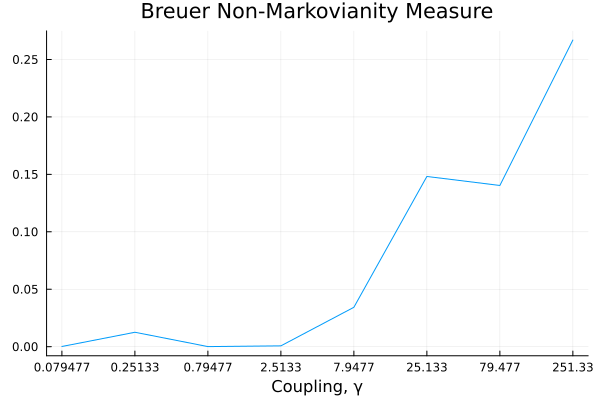

In [121]:
plot(N, xticks = (1:length(γ), γ), legend = false)
title!("Breuer Non-Markovianity Measure")
xlabel!("Coupling, γ")
#savefig("NonMarkovianity.png")

0.013652418458364346

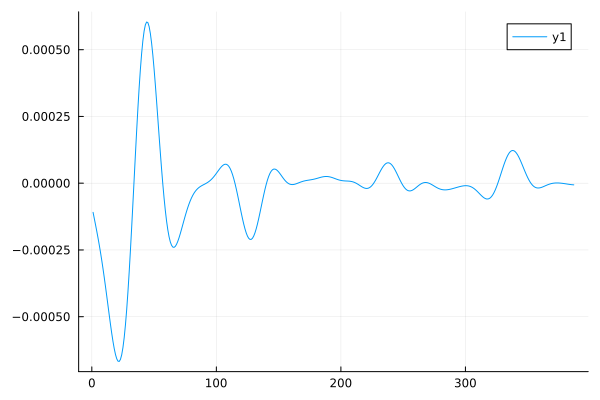

In [64]:
ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*dodeca_files[1]*"_2CUT_data.h5", γ[end])
ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*dodeca_files[19]*"_2CUT_data.h5", γ[end])
dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
print(sum(dD[dD.>0]))
plot(dD)

4.598473798927971e-5

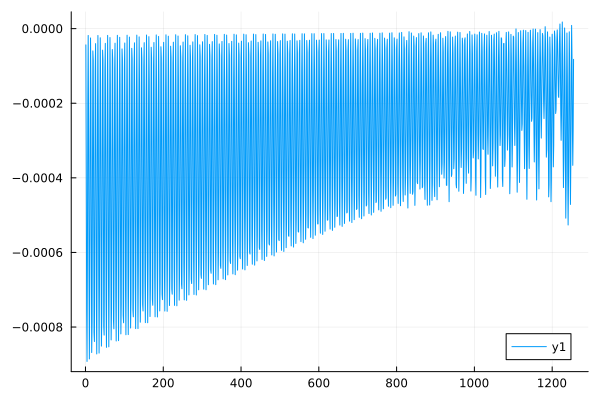

In [65]:
ρs₁, t₁ = LiPoSID.get_rho_series(data_dir*dodeca_files[1]*"_2CUT_data.h5", γ[1])
ρs₂, t₂ = LiPoSID.get_rho_series(data_dir*dodeca_files[2]*"_2CUT_data.h5", γ[1])
dD = diff([TrDist(ρ₁, ρ₂) for (ρ₁, ρ₂) in zip(ρs₁, ρs₂)])
print(sum(dD[dD.>0]))
plot(dD)